In [52]:
#import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics
from sklearn.cluster import AgglomerativeClustering
import random

<h3>Import CSV
<h6>Data Rumah = https://raw.githubusercontent.com/Bryant35/Data_Mining/main/Week%208/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah.csv

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/Bryant35/Data_Mining/main/Week%208/Property%20Dataset%20-%20Clustering%20-%20Data%20Rumah.csv')
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [54]:
#check missing value
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

Cleaning Data

In [55]:
#drop the first row
df.drop(df.index[0], inplace=True)
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [56]:
#check missing value
df.isnull().sum()

Area Category                      0
Nama Daerah                        0
Luas Tanah (m2)                    0
Luas Bangunan (m2)                 0
Jumlah Kamar                       0
Jumlah Kamar Mandi                 1
Tingkat/Lantai                     1
Harga Penawaran (dari Owner)       0
Terjual/Belum                      0
Arah Hadap Rumah                  82
Posisi Rumah                     115
Lebar Jalan Depan Rumah (ROW)     41
dtype: int64

In [57]:
df = df[df['Harga Penawaran (dari Owner)'].str.contains(" ") == False]
df

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [58]:
#create array value without nan to random
array_kamar_mandi = df['Jumlah Kamar Mandi'].groupby(df['Jumlah Kamar Mandi']).count().index
array_tingkat_lantai = df['Tingkat/Lantai '].groupby(df['Tingkat/Lantai ']).count().index
array_arah_rumah = df['Arah Hadap Rumah'].groupby(df['Arah Hadap Rumah']).count().index
arrat_posisi_rumah = df['Posisi Rumah'].groupby(df['Posisi Rumah']).count().index
array_lebar_row = df['Lebar Jalan Depan Rumah (ROW)'].groupby(df['Lebar Jalan Depan Rumah (ROW)']).count().index

In [59]:
#fill missing value with random array
df['Jumlah Kamar Mandi'].fillna(random.choice(array_kamar_mandi), inplace=True)
df['Tingkat/Lantai '].fillna(random.choice(array_tingkat_lantai), inplace=True)
df['Arah Hadap Rumah'].fillna(random.choice(array_arah_rumah), inplace=True)
df['Posisi Rumah'].fillna(random.choice(arrat_posisi_rumah), inplace=True)
df['Lebar Jalan Depan Rumah (ROW)'].fillna(random.choice(array_lebar_row), inplace=True)
df

c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Barat,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,Barat,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,Cul De Sac/Ujung Gang Buntu,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,Barat,Standard,> 2 Mobil


In [60]:
#check data type
df.dtypes

Area Category                     object
Nama Daerah                       object
Luas Tanah (m2)                  float64
Luas Bangunan (m2)               float64
Jumlah Kamar                     float64
Jumlah Kamar Mandi               float64
Tingkat/Lantai                   float64
Harga Penawaran (dari Owner)      object
Terjual/Belum                     object
Arah Hadap Rumah                  object
Posisi Rumah                      object
Lebar Jalan Depan Rumah (ROW)     object
dtype: object

In [61]:
#transform data type
df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype('int64')
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype('int64')
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].astype('int64')
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].astype('int64')
#encoding data
le = LabelEncoder()
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df['Lebar Jalan Depan Rumah (ROW)'])
df.dtypes

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3564/1329925749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Jumlah Kamar Mandi'] = df['Jumlah Kamar Mandi'].astype('int64')
C:\Users\ASUS\AppData\Local\Temp/ipykernel_3564/1329925749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tingkat/Lantai '] = df['Tingkat/Lantai '].astype('int64')
C:\Users\ASUS\AppData\Local\Temp/ipykernel_3564/1329925749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Area Category                      int32
Nama Daerah                        int32
Luas Tanah (m2)                  float64
Luas Bangunan (m2)                 int64
Jumlah Kamar                     float64
Jumlah Kamar Mandi                 int64
Tingkat/Lantai                     int64
Harga Penawaran (dari Owner)       int64
Terjual/Belum                      int32
Arah Hadap Rumah                   int32
Posisi Rumah                       int32
Lebar Jalan Depan Rumah (ROW)      int32
dtype: object

In [62]:
#check data type
df.dtypes

Area Category                      int32
Nama Daerah                        int32
Luas Tanah (m2)                  float64
Luas Bangunan (m2)                 int64
Jumlah Kamar                     float64
Jumlah Kamar Mandi                 int64
Tingkat/Lantai                     int64
Harga Penawaran (dari Owner)       int64
Terjual/Belum                      int32
Arah Hadap Rumah                   int32
Posisi Rumah                       int32
Lebar Jalan Depan Rumah (ROW)      int32
dtype: object

In [63]:
sc = StandardScaler()
scaled = sc.fit_transform(df)
scale = pd.DataFrame(scaled)
scale.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.671343,1.044023,-0.974919,-0.968013,-1.381932,-1.430506,0.305888,-0.566622,0.0,-1.128890,0.622710,0.222382
1,1.010987,-0.368844,-0.282302,-0.452780,0.440789,0.398470,0.305888,-0.276647,0.0,-0.290443,-1.209494,-0.824526
2,0.116877,-0.368844,-0.198198,-0.078066,0.440789,1.008128,0.305888,-0.228562,0.0,1.386452,0.622710,-0.824526
3,-0.777233,-0.368844,0.608207,1.561311,0.440789,1.008128,0.305888,-0.000159,0.0,-1.128890,0.622710,-0.824526
4,-0.777233,-0.368844,1.102934,1.233436,0.440789,1.617787,0.305888,0.697071,0.0,-1.128890,0.622710,-0.824526
5,-1.671343,-0.857914,-0.648399,-0.968013,-1.381932,-1.430506,-1.644146,-0.554337,0.0,-1.128890,0.622710,-0.824526
6,-0.777233,-0.857914,-0.702819,-0.780656,-0.774358,-0.820847,0.305888,-0.514065,0.0,-1.128890,0.622710,-0.824526
7,-1.671343,0.989682,-0.767134,-0.686977,-0.166785,-1.430506,-1.644146,-0.508055,0.0,-1.128890,1.538812,0.222382
8,1.010987,-0.857914,-0.875974,-0.780656,-1.381932,-0.820847,0.305888,-0.499039,0.0,-1.128890,0.622710,-0.824526
9,1.010987,0.310419,-0.767134,-0.911806,-0.774358,-0.820847,-1.644146,-0.468986,0.0,-0.290443,0.622710,1.269291


## K-Means Clustering

In [64]:
# set the parameter for evaluating K
SSE = []
# check the inertia for each K
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 SSE.append(kmeans.inertia_)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


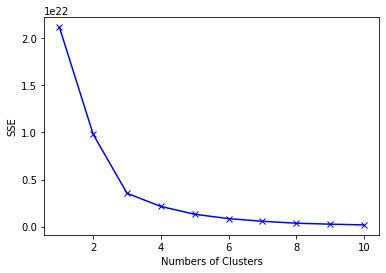

In [65]:
plt.plot(K, SSE,'bx-')
plt.xlabel('Numbers of Clusters') 
plt.ylabel('SSE') 
plt.show()

In [66]:
k = KneeLocator(range(1,11), SSE, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  3


In [67]:
kmeans = KMeans(n_clusters=5, random_state = 0, init = 'random', max_iter=300)
y_kmeans = kmeans.fit_predict(scale)
y_kmeans    
df['K Means'] = y_kmeans

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3564/4094434997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K Means'] = y_kmeans


In [78]:
df.groupby('K Means').agg(Area_Category = ('Area Category', pd.Series.mode),
Luas_Tanah = ('Luas Tanah (m2)', pd.Series.mean),
Luas_Bangunan = ('Luas Bangunan (m2)', pd.Series.mean),
Jumlah_Kamar = ('Jumlah Kamar', pd.Series.mean),
Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi', pd.Series.mean),
Tingkat_Lantai = ('Tingkat/Lantai ', pd.Series.mean),
Harga_Penawaran = ('Harga Penawaran (dari Owner)', pd.Series.mean),
Terjual_Belum = ('Terjual/Belum', pd.Series.mode),
Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode),
Posisi_Rumah = ('Posisi Rumah', pd.Series.mode),
Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ('K Means', 'count')
)

,Area_Category,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
K Means,,,,,,,,,,,,
0,2,624.871795,683.076923,6.512821,5.307692,1.948718,1.894295e+10,0,3,0,2,39
1,1,197.227273,240.106061,4.560606,3.742424,1.954545,3.708000e+09,0,3,2,2,66
2,0,112.840909,119.181818,2.704545,1.636364,1.522727,1.453306e+09,0,0,2,0,44
3,3,115.400000,121.557143,2.914286,2.057143,1.585714,1.668993e+09,0,0,2,0,70
4,1,218.977011,291.494253,4.942529,4.068966,2.080460,4.208355e+09,0,1,2,0,87


## Hierarchical

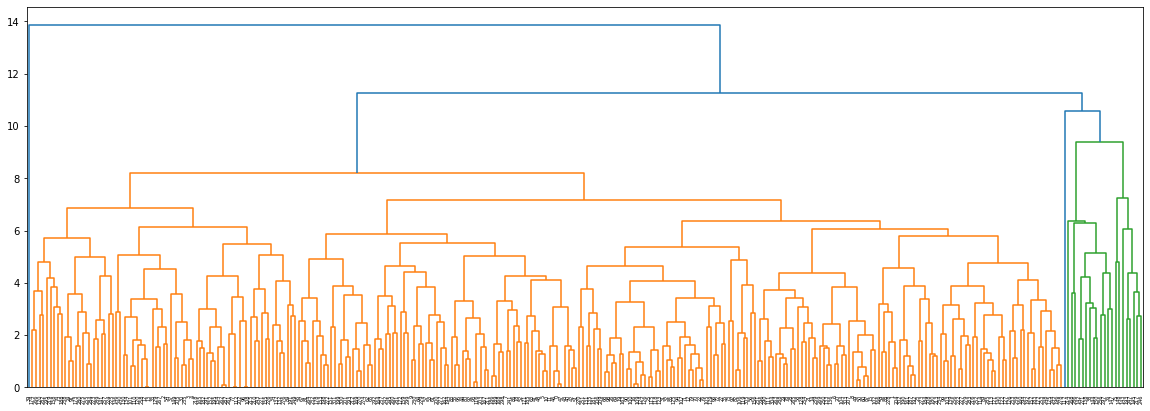

In [73]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scale, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [79]:
hc_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_model.fit_predict(scale)
labels = hc_model.labels_
labels
df['K Means'] = labels

C:\Users\ASUS\AppData\Local\Temp/ipykernel_3564/1959402313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K Means'] = labels


In [81]:
df.groupby('K Means').agg(Area_Category = ('Area Category', pd.Series.mode),
Luas_Tanah = ('Luas Tanah (m2)', pd.Series.mean),
Luas_Bangunan = ('Luas Bangunan (m2)', pd.Series.mean),
Jumlah_Kamar = ('Jumlah Kamar', pd.Series.mean),
Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi', pd.Series.mean),
Tingkat_Lantai = ('Tingkat/Lantai ', pd.Series.mean),
Harga_Penawaran = ('Harga Penawaran (dari Owner)', pd.Series.mean),
Terjual_Belum = ('Terjual/Belum', pd.Series.mode),
Arah_Hadap_Rumah = ('Arah Hadap Rumah', pd.Series.mode),
Posisi_Rumah = ('Posisi Rumah', pd.Series.mode),
Lebar_Jalan_Depan_Rumah = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ('K Means', 'count')
)

,Area_Category,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Count
K Means,,,,,,,,,,,,
0,0,101.555556,98.833333,2.574074,1.611111,1.333333,1.383508e+09,0,0,0,0,54
1,3,174.113821,227.056911,4.292683,3.390244,2.016260,3.043158e+09,0,1,2,0,123
2,"[1, 2]",572.953488,621.627907,6.139535,5.093023,1.976744,1.400930e+10,0,3,0,2,43
3,1,187.939759,225.361446,4.301205,3.409639,1.855422,3.397434e+09,0,3,2,2,83
4,2,781.666667,966.666667,6.666667,6.000000,1.666667,6.566666e+10,0,0,"[0, 2, 3]",0,3
